<a href="https://colab.research.google.com/github/andreafalcon05-collab/Inteligencia-Artificial/blob/main/Expo_Multicapa/Expo_lentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediccion de Lentes de Contacto


In [ ]:
"""Instalar la libreria para el conjunto de datos"""
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Conjunto de datos
lenses = fetch_ucirepo(id=58)

# Asignacion de caracteristicas para casa variable
X = lenses.data.features
y = lenses.data.targets

# imprime los metadatos
print(lenses.metadata)

# imprime la informacion
print(lenses.variables)



{'uci_id': 58, 'name': 'Lenses', 'repository_url': 'https://archive.ics.uci.edu/dataset/58/lenses', 'data_url': 'https://archive.ics.uci.edu/static/public/58/data.csv', 'abstract': 'Database for fitting contact lenses', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 24, 'num_features': 3, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5K88Z', 'creators': ['J. Cendrowska'], 'intro_paper': None, 'additional_info': {'summary': 'The examples are complete and noise free. The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type, if any, to fit.\r\n\r\n Notes:  \r\n\r\n--This database is complete (all possible combinations of attribute-value pairs are re

Mostrar el conjunto X
* Edad del Paciente

    1.   Joven
    2.   pre-presbiopico
    3. Presbiopico

*  Prescripcion de lentes
    1. miopia
    2. hipermetropia
*  Asigmatismo
    1. no
    2. si



In [ ]:
X.head() #muestra las caracteristicas de cada variable

,age,spectacle_prescription,astigmatic
1,1,1,1
2,1,1,2
3,1,2,1
4,1,2,2
5,2,1,1


Mostrar conjunto Y
* Clases
    4. lentes de contacto duro
    5. lentes de contacto blando
    15. sin lentes de contacto

In [ ]:
y.head() #muestra las carecteristicas del objetivo

,class
1,3
2,2
3,3
4,1
5,3


In [ ]:
X.info() #muestra si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 24
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     24 non-null     int64
 1   spectacle_prescription  24 non-null     int64
 2   astigmatic              24 non-null     int64
dtypes: int64(3)
memory usage: 768.0 bytes


In [ ]:
y.info() #muestra si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


In [ ]:
"""Elimina las filas con valores nulos"""
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


In [ ]:
df.info() #Muestra los valores nulos en el dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 24
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     24 non-null     int64
 1   spectacle_prescription  24 non-null     int64
 2   astigmatic              24 non-null     int64
 3   class                   24 non-null     int64
dtypes: int64(4)
memory usage: 960.0 bytes


In [ ]:
"""definimos nuevamnete conjunto X e Y"""
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
"""Visualizas el dataframe despues de la limpieza"""
df

,age,spectacle_prescription,astigmatic,class
1,1,1,1,3
2,1,1,2,2
3,1,2,1,3
4,1,2,2,1
5,2,1,1,3
6,2,1,2,2
7,2,2,1,3
8,2,2,2,1
9,1,1,1,3
10,1,1,2,2


In [ ]:
"""Separa los datos en conjunto de entrenamiento y prueba"""
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# One-hot codifica la variable objetivo
y_one_hot = to_categorical(y - 1, num_classes=3) # Resta 1 para hacer clases 0, 1, 2

X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, # Use one-hot codificado y
    test_size=0.2, random_state=1
)

In [ ]:
"""Visualiza variables de entrenamiento y prueba"""
print(X_train.shape)
print(X_test.shape)


(19, 3)
(5, 3)


#Escala
* 0: Media
* 1: Esviacion estandar

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Red Neuronal


*   **Sequential**: Define el modelo neuronal
*   Se añaden capas de entrada y ocultas densamente conectadas **Dense** con activación ReLU y una capa de salida con activación softmax para clasificar.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compilar el modelo
* **Adam**: Optimizador con tasa de aprendizaje 0.001
* **Copilacion del modelo**: Se utliza el optimizador Adam y a función de pérdida de entropía cruzada categórica dispersa (categorical_crossentropy) para la clasificación.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy', #  Se cambia la perdida categorical_crossentropy para objetos codificados
    metrics=['accuracy'], # Cambia la metrica de precision
)

#Entrenar el modelo
**FIT**: Especifica el número de épocas, el tamaño del lote y la proporción de validación para monitorear el rendimiento del modelo durante el entrenamiento.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=6, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/6
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.2542 - loss: 1.0188 - val_accuracy: 0.6000 - val_loss: 0.9394
Epoch 2/6
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5638 - loss: 0.9601 - val_accuracy: 0.6000 - val_loss: 0.8514
Epoch 3/6
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6670 - loss: 0.8495 - val_accuracy: 0.6000 - val_loss: 0.7506
Epoch 4/6
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6234 - loss: 0.7559 - val_accuracy: 0.6000 - val_loss: 0.6522
Epoch 5/6
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7683 - loss: 0.6469 - val_accuracy: 0.6000 - val_loss: 0.5625
Epoch 6/6
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7415 - loss: 0.4863 - val_accuracy: 0.8000 - val_loss: 0.4708


#Graficando la funcion de perdida
La función de pérdida debe tender hacia cero, para poder decir que el modelo esta teniendo un aprendizaje correcto.

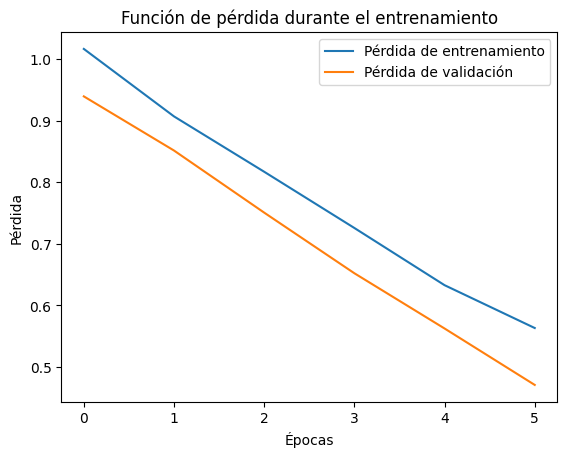

In [ ]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


#Evaluacion
Evaluar modelo en conjunto de prueba

**Evaluate**: Evalua el rendimiento del modelo donde se obtienen la pérdida y la precisión del modelo en los datos de prueba.

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step - accuracy: 0.8000 - loss: 0.4708
Test Mean Absolute Error: 0.80


#Matriz confusion y Sensibilidad (recall)


*   **Confusion_matrix**: calcula la matris de confusion
*   **recall_score**: calcula la sensibilidad para cada clase


#Visualiza la matriz de confusion y mostrar la sensibilidad para cada clase.


*   **Matriz de confusion**: imagen de colores
*   **Recall**: indica qué tan efectivo es el modelo para encontrar todas las instancias positivas en comparación con el total de instancias positivas reales en el conjunto de datos.

*1.0(100%):* significa que el modelo identifica todas las instancias positivas correctamente, es decir, no hay falsos negativos.

*0.0(0%):*  que el modelo no identifica ninguna instancia positiva correctamente, es decir, todos los casos positivos son clasificados como negativos (falsos negativos).

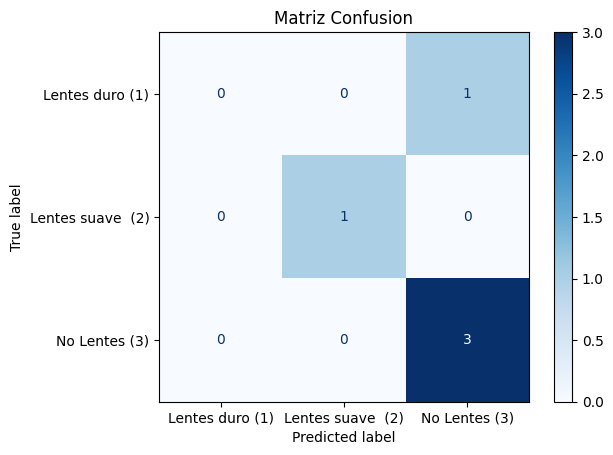


Matriz Confusion:
[[0 0 1]
 [0 1 0]
 [0 0 3]]

Sensitivity (Recall) per class:
Lentes duro (1): 0.0000
Lentes suave (2): 1.0000
No Lentes (3): 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Utilizar los indices de clases rrales de las celdas anteriores
predicted_class = predicted_classes # Usar la variable de la celda anterior
actual_class = actual_classes # Usa la variable de la celda anterior

# las  clases anteriores actuales y las predecidas estas indexadas 0
# las clases originales 1,2,3 que correspinden a 0,1,2, despues restar 1 para la codificacion
# Mostramos la matriz confusion con etiquetas correspondientes a las orginales
cm = confusion_matrix(actual_class, predicted_class, labels=[0, 1, 2]) # etiquetas indexadas 0
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Lentes duro (1)', 'Lentes suave  (2)', 'No Lentes (3)']) # Display original class labels
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz Confusion')
plt.show()

sensitivity = recall_score(actual_class, predicted_class, average=None)
print("\nMatriz Confusion:")
print(cm)
print("\nSensitivity (Recall) per class:")
# The sensitivity scores are for the 0-indexed classes, so we'll print them with the corresponding original class labels
print(f"Lentes duro (1): {sensitivity[0]:.4f}")
print(f"Lentes suave (2): {sensitivity[1]:.4f}")
print(f"No Lentes (3): {sensitivity[2]:.4f}")

#Prediccion
Hace la prediccion y compara con valores reales

In [ ]:
import numpy as np
predictions = model.predict(X_test)
# Convertir predicciones de probabilidades a indices de clase
predicted_classes = np.argmax(predictions, axis=1)
# convertir y_test codificado one_hot de nuevo a indices de clase
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual': actual_classes, 'Predicted': predicted_classes})
print(comparison.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
   Actual  Predicted
0       1          0
1       2          0
2       0          1
3       2          1
4       2          0


#REALIZADO
Andrea Itzel Falcon Mendoza

Maximiliano Rodriguez Muñoz